Accuracy: 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      7303
        True       1.00      1.00      1.00       935

    accuracy                           1.00      8238
   macro avg       1.00      1.00      1.00      8238
weighted avg       1.00      1.00      1.00      8238



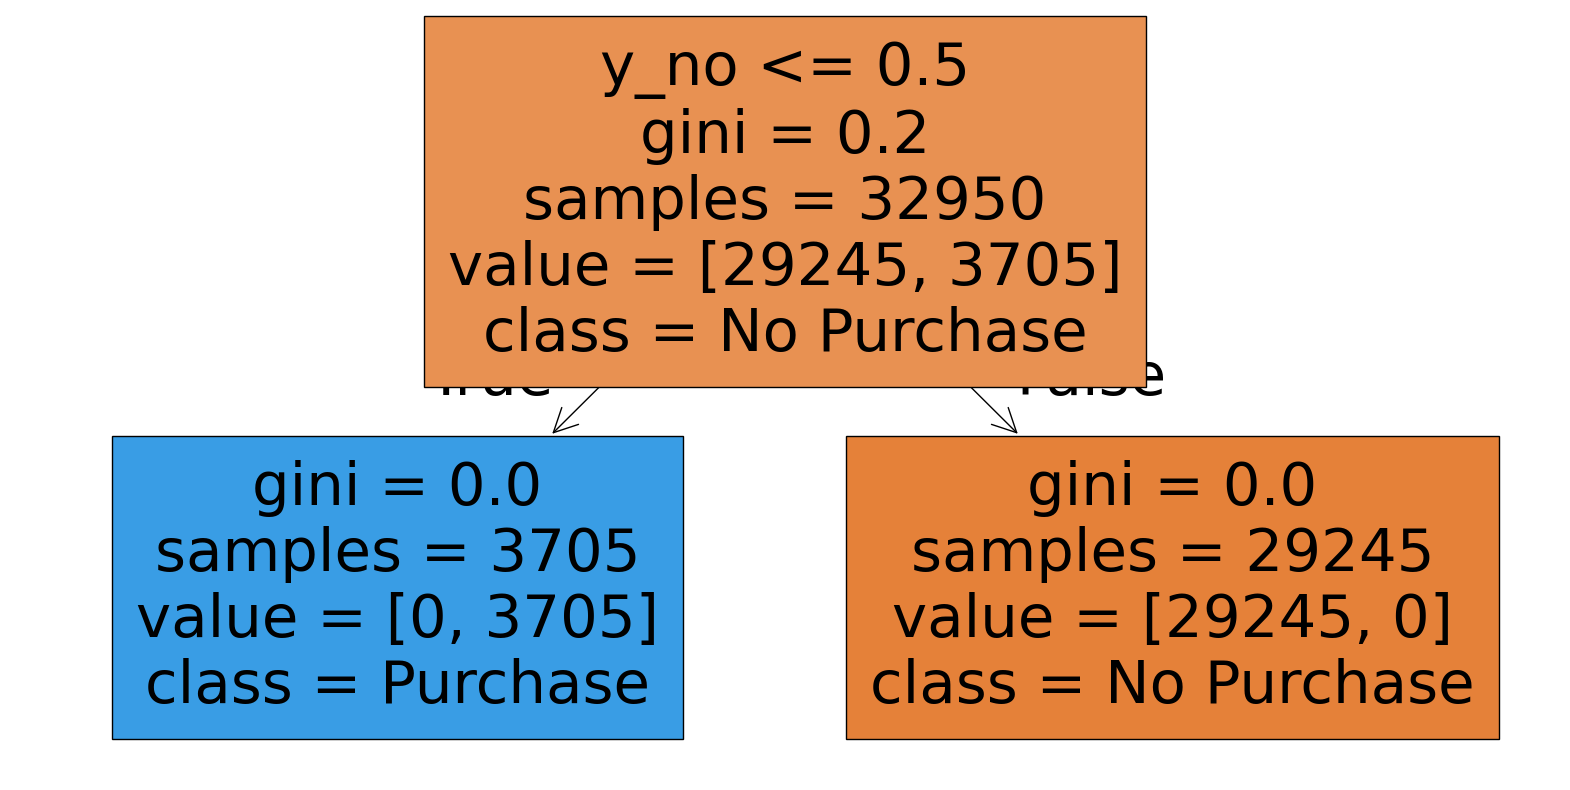

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import requests
from zipfile import ZipFile
from io import BytesIO

# Download and extract the ZIP file
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"
response = requests.get(url)
zip_file = ZipFile(BytesIO(response.content))
zip_file.extractall()

# Load the CSV file
df = pd.read_csv("bank-additional/bank-additional-full.csv", sep=';')

# Data Preprocessing
df = pd.get_dummies(df)
X = df.drop('y_yes', axis=1)
y = df['y_yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Evaluate Model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

# Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=["No Purchase", "Purchase"])
plt.show()


